# Exploratory Time Series Analysis

In this notebook, we explore the data as a time series from 2017-01 to 2024-05 in order to check potential trend and seasonality before further analysis.

## Import Data

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime, timedelta

In [2]:
sns.set_style('whitegrid')

In [3]:
bike = pd.read_csv('../bike data/aggregate data.csv')

In [4]:
bike.head()

,Date,Bike trips,Total distance (m),Total duration (sec),Mean departure temperature (C),Mean return temperature (C),Electric bike trips
0,2017-01-01,162,338025.0,232693.0,3.555556,4.296296,NaN
1,2017-01-02,270,660054.0,382729.0,2.718519,3.688889,NaN
2,2017-01-03,384,635395.0,376013.0,0.807292,1.791667,NaN
3,2017-01-04,460,766082.0,376721.0,2.767391,3.643478,NaN
4,2017-01-05,524,888222.0,524933.0,2.601145,3.524809,NaN


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2678 entries, 0 to 2677
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            2678 non-null   object 
 1   Bike trips                      2678 non-null   int64  
 2   Total distance (m)              2678 non-null   float64
 3   Total duration (sec)            2678 non-null   float64
 4   Mean departure temperature (C)  2646 non-null   float64
 5   Mean return temperature (C)     2646 non-null   float64
 6   Electric bike trips             639 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 146.6+ KB


In [6]:
#split the date into the following columns: Year-Month, Year, Month, Day
def get_year(date_str):
    return(date_str.split('-')[0])
def get_month(date_str):
    return(date_str.split('-')[1])
def get_day(date_str):
    return(date_str.split('-')[2])
def get_year_month(date_str):
    return ('-'.join((date_str.split('-')[0],date_str.split('-')[1])))

In [7]:
bike['Year-Month'] = bike['Date'].apply(get_year_month)
bike['Year'] = bike['Date'].apply(get_year)
bike['Month'] = bike['Date'].apply(get_month)
bike['Day'] = bike['Date'].apply(get_day)

## Trend in Years

We first explore the timeline in the scale of years.

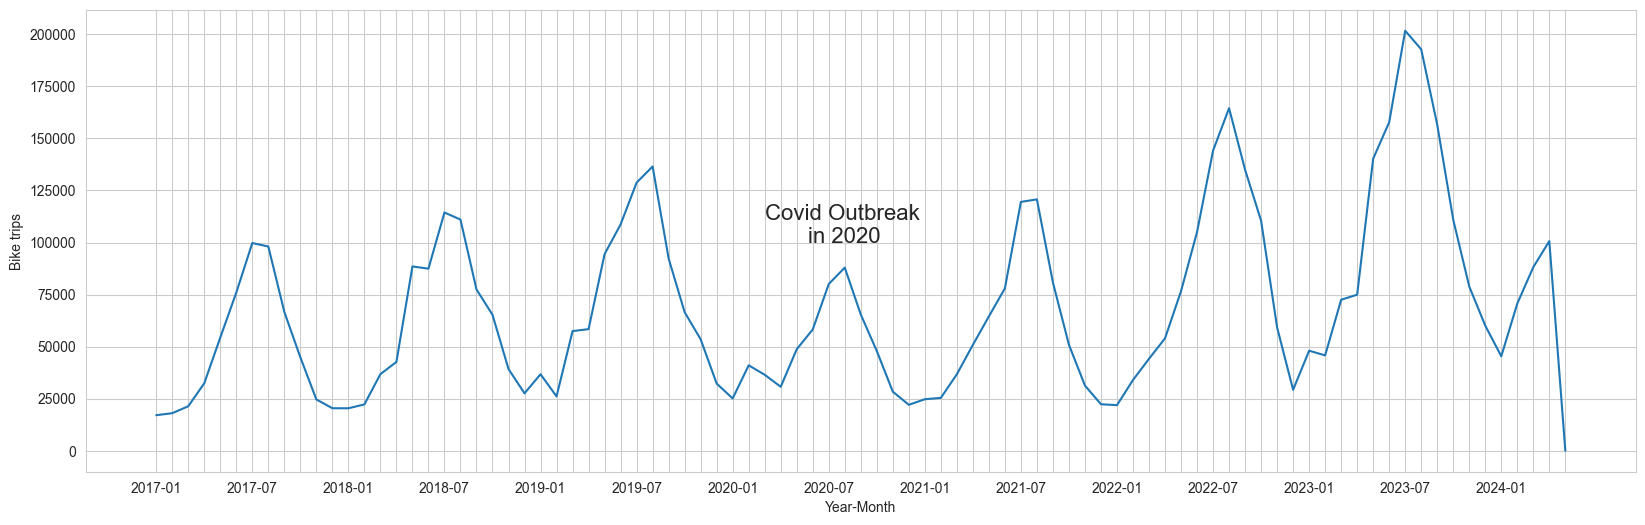

In [8]:
plt.figure(figsize=(20,6))
ax = sns.lineplot(data=bike.groupby('Year-Month')['Bike trips'].sum().reset_index(),x='Year-Month',y='Bike trips')
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 6 == 0:  # every 6th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.text(s = 'Covid Outbreak \n       in 2020', x = '2020-03', y = 100000, fontsize=16)

plt.show()

Despite the sudden decrease in year 2020, which is very likely related to the initial Covid 19 outbreak, the bike trips number show a trend of stready growth in years. 

We will plot the linear regression from the start of year 2017 to the end of year 2019, and from the start of year 2021 to the end of year 2023. 

In [9]:
bike_1 = bike.loc[bike.Year < '2020']
bike_2 = bike.loc[bike.Year > '2020'].loc[bike.Year < '2024']

In [10]:
def str_to_date(s):
    return (datetime.strptime(s,'%Y-%m'))

In [11]:
cong_1 = bike_1.groupby('Year-Month')['Bike trips'].sum().reset_index()
cong_1['Year-Month'] = pd.to_datetime(cong_1['Year-Month']).apply(lambda date: date.toordinal())
cong_2 = bike_2.groupby('Year-Month')['Bike trips'].sum().reset_index()
cong_2['Year-Month'] = pd.to_datetime(cong_2['Year-Month']).apply(lambda date: date.toordinal())

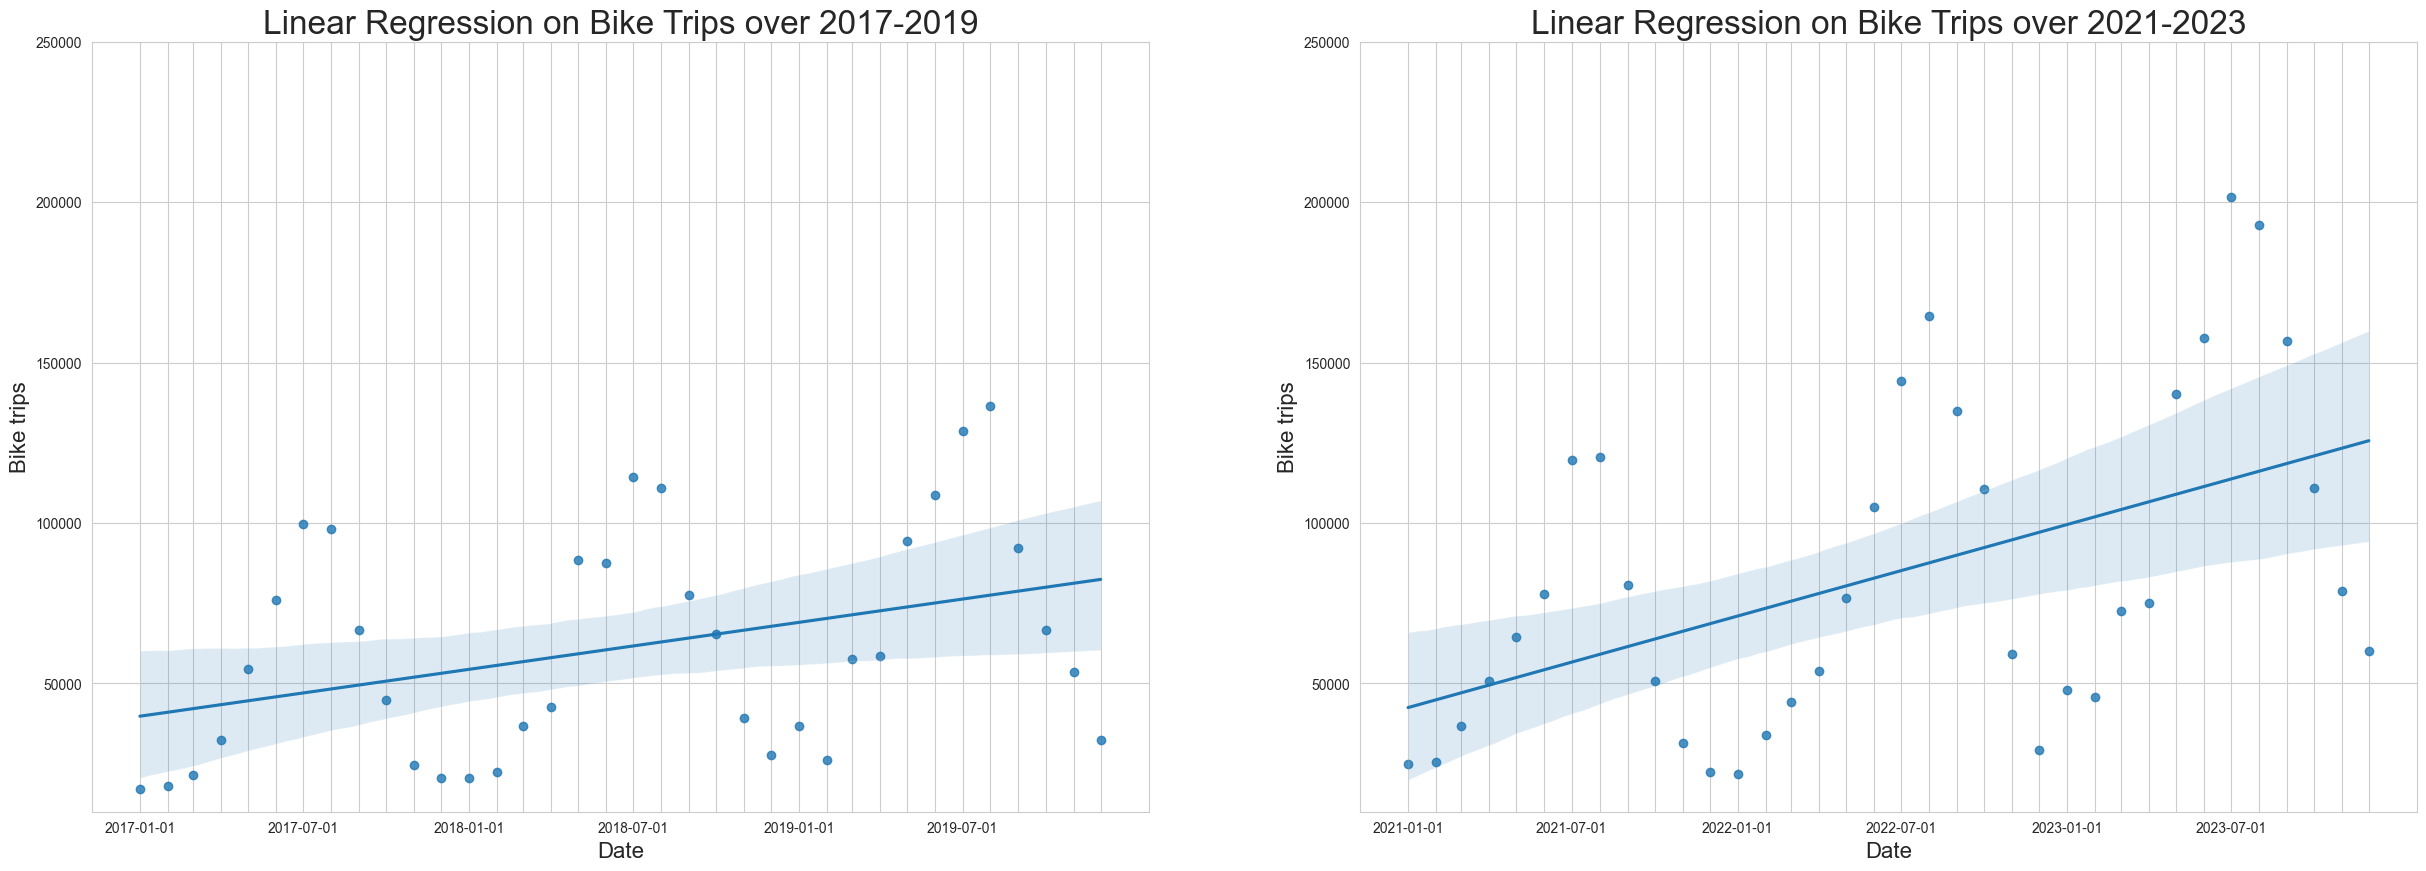

In [12]:
# set figure size
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(30)

# plot the 2017-2019 regplot
sns.regplot(data = cong_1, x = 'Year-Month', y='Bike trips', ax=ax[0])

# set ax[0] x ticks
ax[0].set_xticks(cong_1['Year-Month'])
new_labels = [date.fromordinal(int(item)) for item in ax[0].get_xticks()]
ax[0].set_xticklabels(new_labels)
for ind, label in enumerate(ax[0].get_xticklabels()):
    if ind % 6 == 0:  # every 6th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
# set ax[0] y ticks
ax[0].set_ylim(10000,250000)
ax[0].set_xlabel('Date',fontsize=16)
ax[0].set_ylabel('Bike trips',fontsize=16)
ax[0].set_title('Linear Regression on Bike Trips over 2017-2019', fontsize=24)


sns.regplot(data = cong_2, x = 'Year-Month', y='Bike trips',ax=ax[1])
ax[1].set_xticks(cong_2['Year-Month'])
new_labels = [date.fromordinal(int(item)) for item in ax[1].get_xticks()]
ax[1].set_xticklabels(new_labels)
for ind, label in enumerate(ax[1].get_xticklabels()):
    if ind % 6 == 0:  # every 6th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax[1].set_ylim(10000,250000)
ax[1].set_xlabel('Date',fontsize=16)
ax[1].set_ylabel('Bike trips',fontsize=16)

ax[1].set_title('Linear Regression on Bike Trips over 2021-2023', fontsize=24)

plt.show()

The linear reg plot shows the growing trend both before and after year 2020.

We will then plot the residue of the linear regression.

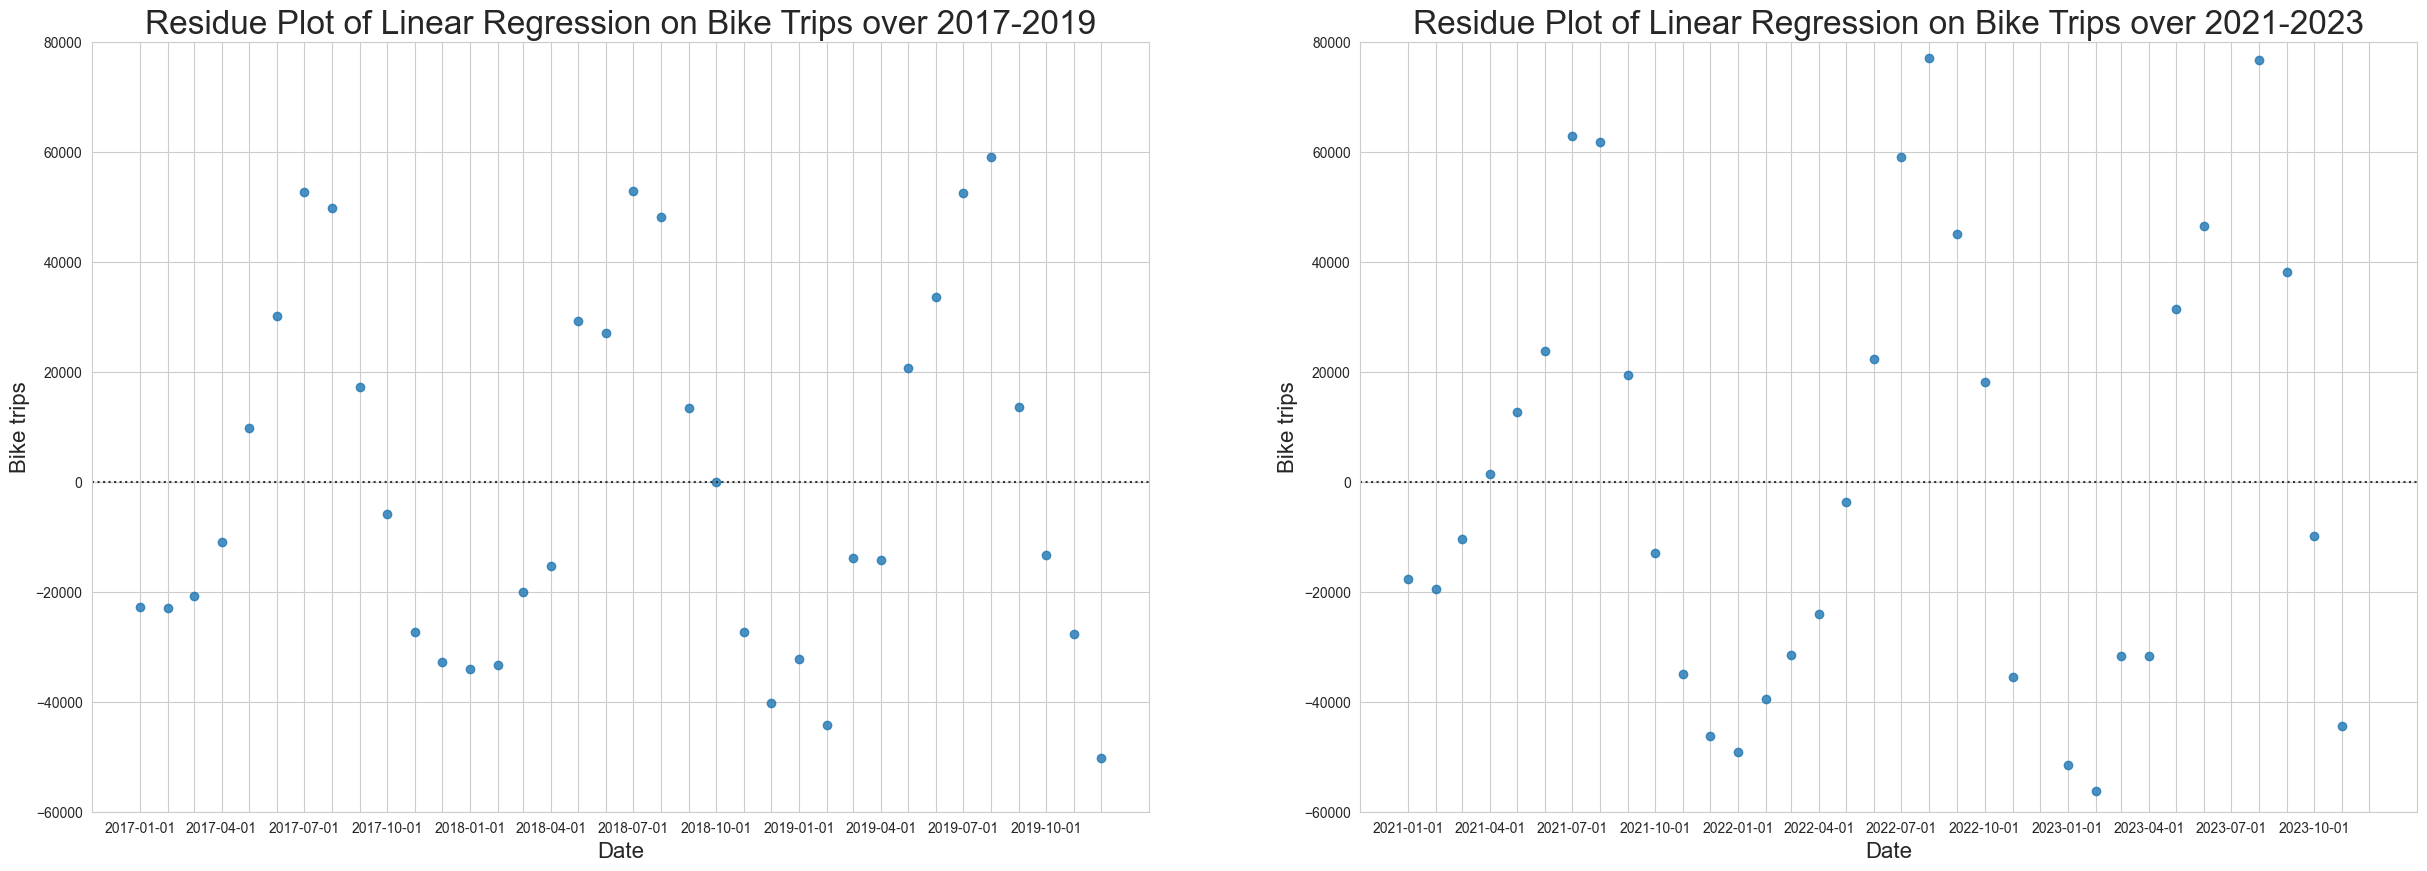

In [13]:
# set figure size
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(30)

# plot the 2017-2019 regplot
sns.residplot(data = cong_1, x = 'Year-Month', y='Bike trips', ax=ax[0])

# set ax[0] x ticks
ax[0].set_xticks(cong_1['Year-Month'])
new_labels = [date.fromordinal(int(item)) for item in ax[0].get_xticks()]
ax[0].set_xticklabels(new_labels)
for ind, label in enumerate(ax[0].get_xticklabels()):
    if ind % 3 == 0:  # every 3th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
# set ax[0] y ticks
ax[0].set_ylim(-60000,80000)
ax[0].set_xlabel('Date',fontsize=16)
ax[0].set_ylabel('Bike trips',fontsize=16)
ax[0].set_title('Residue Plot of Linear Regression on Bike Trips over 2017-2019', fontsize=24)

# Do the same thing for year 2021-2023
sns.residplot(data = cong_2, x = 'Year-Month', y='Bike trips',ax=ax[1])
ax[1].set_xticks(cong_2['Year-Month'])
new_labels = [date.fromordinal(int(item)) for item in ax[1].get_xticks()]
ax[1].set_xticklabels(new_labels)
for ind, label in enumerate(ax[1].get_xticklabels()):
    if ind % 3 == 0:  # every 3th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax[1].set_ylim(-60000,80000)
ax[1].set_xlabel('Date',fontsize=16)
ax[1].set_ylabel('Bike trips',fontsize=16)

ax[1].set_title('Residue Plot of Linear Regression on Bike Trips over 2021-2023', fontsize=24)
plt.show()

The residue looks free of trend, except for the magnitude of the periodic fluctuation. In fact, we may apply a regression model with sin(date) and cos(date) as independent variable to further explore the residue. We will do that in the next section: Seasonality.

One remaining thing in this section is to consider the possible causes for the yearly growing trend. This could be of significance in predicting whether this trend is going to continue. A lot of factors could contribute to the yearly growth. For example, increasing investment by Mobi into the bike infrastructure, change in city's demography, change in overall temperature are all possible factors. 

However, these factors might contribute differently to the future trend in yearly growth. For example, if this growth is mainly caused by the increasing investment by Mobi into the city bike infrastructure, the growing trend may reach a threshold when the bike numbers meet the requirement. But if other factors like population and climate are at play, then the trend may be more long lasting.

To check the possible influence of climate change, we will plot the monthly average temperature and precipitation together with the bike trips data.

In [14]:
# store the relevant monthly average weather data in a dataframe : climate
years = ['2017','2018','2019','2020','2021','2022','2023']
months = ['01','02','03','04','05','06','07','08','09','10','11','12']
Year_Month = []
Mean_Temp = []
Total_Precip = []
for year in years:
    filepath = '../weather_data/' + year + '_Daily.csv'
    df = pd.read_csv(filepath)
    #group by month
    #extend %Y-%m to list 1
    Year_Month.extend([year+'-'+month for month in months])
    #compute mean temp, total precip and extend them in respective lists 2,3,...
    Mean_Temp.extend(df.groupby('Month')['Mean Temp (°C)'].mean().values.tolist()) 
    Total_Precip.extend(df.groupby('Month')['Total Precip (mm)'].sum().values.tolist())
    del(df)
#make dataframe from list 1,2,3...    
climate = pd.DataFrame({'Year-Month':Year_Month, 'Mean Temp':Mean_Temp, 'Total Precip':Total_Precip})

In [15]:
climate.head(10)

,Year-Month,Mean Temp,Total Precip
0,2017-01,1.903226,98.8
1,2017-02,2.985714,128.8
2,2017-03,6.777419,206.0
3,2017-04,9.520690,134.0
4,2017-05,12.812903,102.2
5,2017-06,15.616667,46.4
6,2017-07,18.303226,1.8
7,2017-08,18.832258,5.0
8,2017-09,15.990000,29.4
9,2017-10,9.776667,114.3


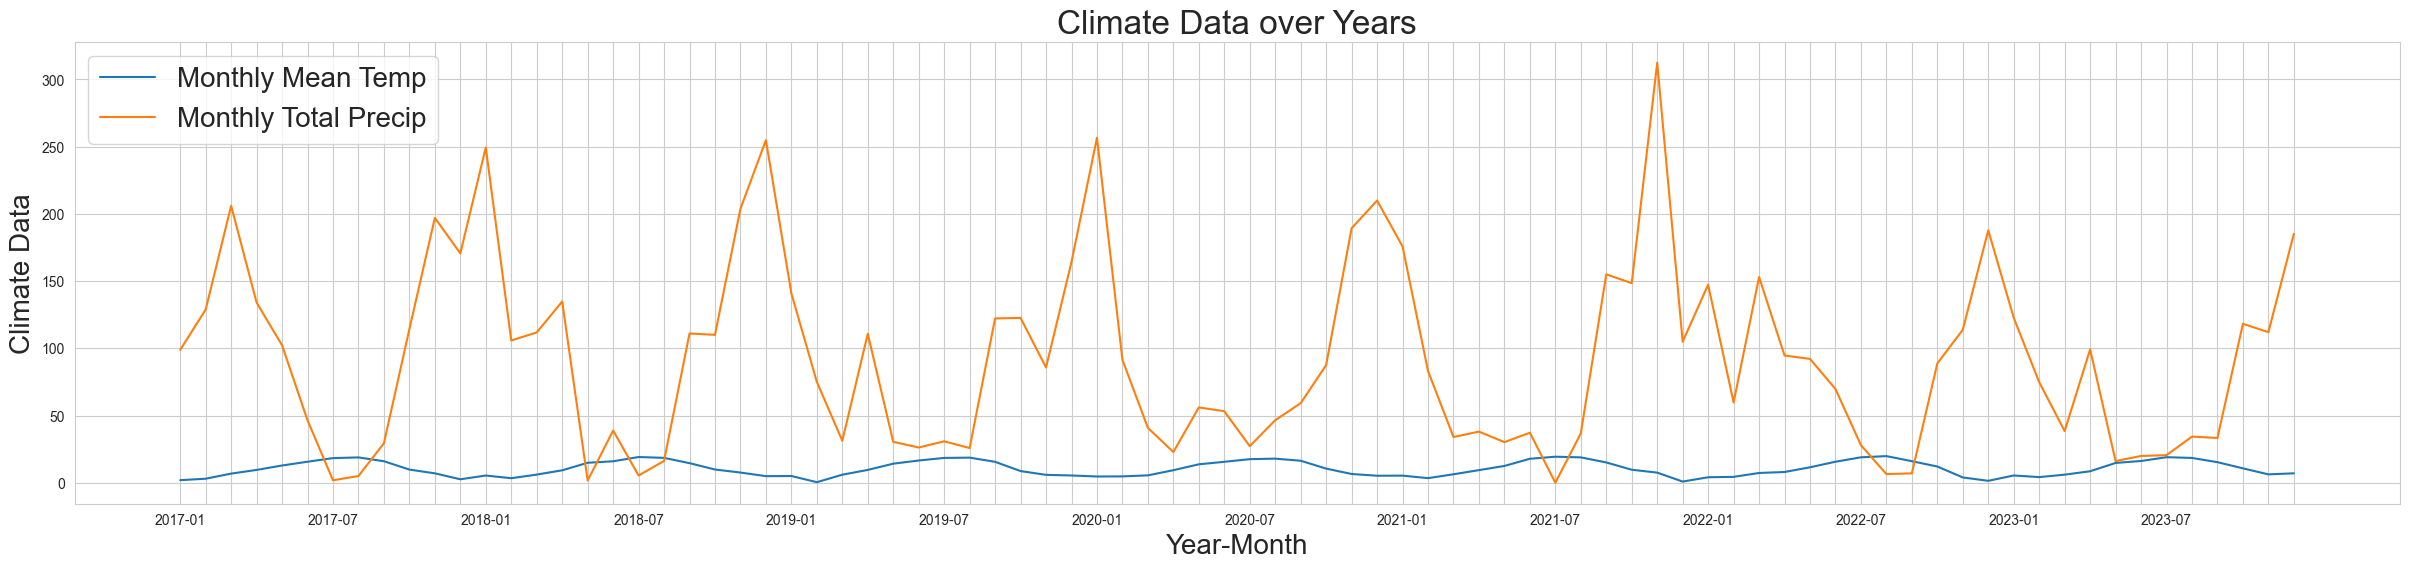

In [16]:
fig, ax = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(30)

sns.lineplot(data=climate, x='Year-Month', y='Mean Temp', ax=ax, label='Monthly Mean Temp')
sns.lineplot(data=climate, x='Year-Month', y='Total Precip', ax=ax, label='Monthly Total Precip')
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 6 == 0:  # every 6th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.set_xlabel('Year-Month', fontsize=20)
ax.set_ylabel('Climate Data', fontsize=20)
plt.title('Climate Data over Years',fontsize=24)
plt.legend(loc=2,fontsize=20)
plt.show()


Climate data does not show trend in years. The bike usage trend in years is likely caused by other factors.

A much more likely cause of yearly growth is improvement in Mobi's own infrastructure, e.g. increased bike numbers, expanded service areas, more docks, etc. 

However, these data are difficult to find. One thing that can be gleaned from our existing data is the total number of bike stations. We can assume the total stations number of a month to be the count of all unique Departure station name of that month. 

In [17]:
def get_weather_month(s):
    return(int(s.split('/')[0]))

In [18]:
station_count = []

In [19]:
# import 2017 data
df = pd.read_csv('../bike data/raw data/All of 2017.csv')
df['Month'] = df['Departure'].apply(get_weather_month)
station_count.extend(df.groupby('Month')['Departure station'].nunique())
del(df)

In [20]:
for year in range(2018,2024):
    for month in ['January','February','March','April','May','June','July','August','September','October','November','December']:
        filepath = '../bike data/raw data/' + month + ' ' + str(year) + '.csv'
        df = pd.read_csv(filepath)
        station_count.append(df['Departure station'].nunique())
        del(df)

/var/folders/z_/vfnvng3n3hg_y07yr6f3l64w0000gn/T/ipykernel_24741/3505908053.py:4: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
/var/folders/z_/vfnvng3n3hg_y07yr6f3l64w0000gn/T/ipykernel_24741/3505908053.py:4: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
/var/folders/z_/vfnvng3n3hg_y07yr6f3l64w0000gn/T/ipykernel_24741/3505908053.py:4: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
/var/folders/z_/vfnvng3n3hg_y07yr6f3l64w0000gn/T/ipykernel_24741/3505908053.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
/var/folders/z_/vfnvng3n3hg_y07yr6f3l64w0000gn/T/ipykernel_24741/3505908053.py:4: DtypeWarning: Columns (2) have mixed types. 

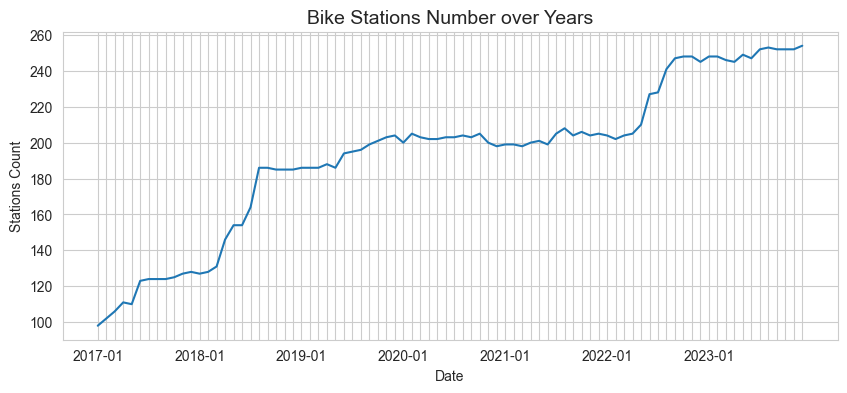

In [21]:
fig, ax = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(10)
sns.lineplot(x=Year_Month, y=station_count, ax=ax)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 12 == 0:  # every 12th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.set_xlabel('Date',fontsize=10)
ax.set_ylabel('Stations Count',fontsize=10)
plt.title('Bike Stations Number over Years',fontsize=14)
plt.show()

Based on the plot, the increasing number of bike stations and expanded service region likely contributed to the yearly bike usage growth. 

Conclusion : 
1. Since our kpi/goal is to predict the bike usage in days or at most weeks, yearly trend seems irrelevant at first to our prediction. However, its existence implies that the weather conditions (and other relevant variables) are not the only factors that contributes to bike usage.
2. For example, suppose we want to do a linear regression, whose independent variables are 'Temp', 'Precip' and 'Daylight', and whose datasets containing data from 2017 to 2024. We will have to preprocess the data by somehow seperating the contribution of the yearly growing trend from the total bike usage. Otherwise, our dataset will be biased over years.
3. Whether this growing trend should continue from 2024 is unclear at this moment. Because (at least a part of) the trend is caused by increasing number of bike stations, expanded service region and etc, such growth could reach a threshold at some time, if the bike service meets the demand of the city population.

## Seasonality in Month

In this section, we remove the growing trend from bike usage and consider the residue data. Our goal is to explore potential seasonality in monthly residue data.

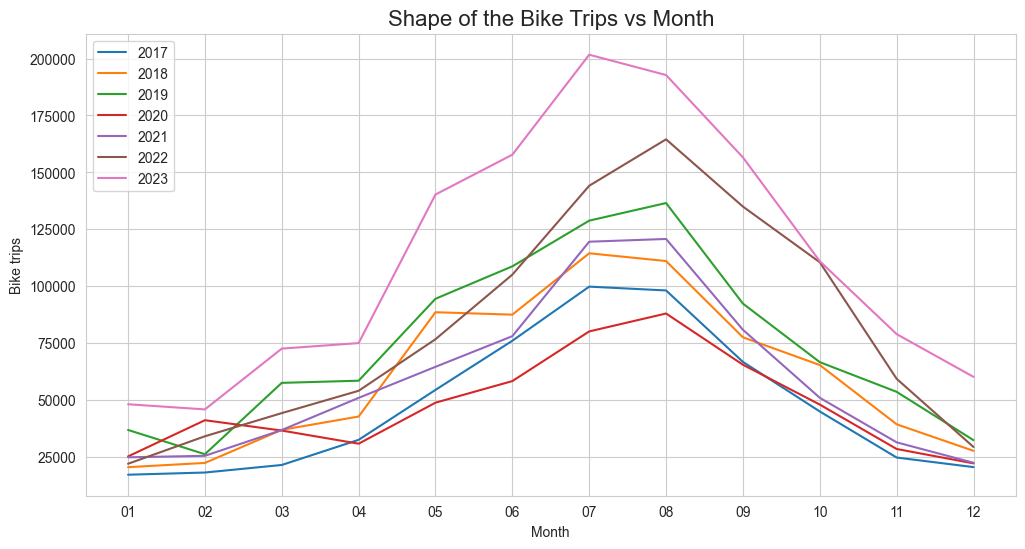

In [22]:
years = ['2017','2018','2019','2020','2021','2022','2023']
months = ['01','02','03','04','05','06','07','08','09','10','11','12']
fig = plt.figure(figsize = (12,6))
for year in years:
    y_bike = bike.loc[bike['Year'] == year].groupby('Month')['Bike trips'].sum()
    sns.lineplot(data=y_bike,label=year)
plt.legend(loc=2)
plt.title('Shape of the Bike Trips vs Month',fontsize = 16)
plt.show()

The seasonality in month is very likely cause by the difference of weather, teperature, precipitation, etc among months. This notebook will not delve into detailed model involving these factors. Instead, we will just do a preliminary exploration of the monthly seasonality. In particular, we will fit a mathematical model on residue

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
reg_1 = LinearRegression()
reg_1.fit(cong_1[['Year-Month']],cong_1['Bike trips'])

reg_2 = LinearRegression()
reg_2.fit(cong_2[['Year-Month']],cong_2['Bike trips'])

LinearRegression()

In [25]:
cong_1['Residue'] = cong_1['Bike trips'] - reg_1.predict(cong_1[['Year-Month']])
cong_2['Residue'] = cong_2['Bike trips'] - reg_2.predict(cong_2[['Year-Month']])

In [26]:
cong_1['Converted-Date'] = cong_1['Year-Month']/365*2*np.pi
cong_2['Converted-Date'] = cong_2['Year-Month']/365*2*np.pi

In [27]:
cong_1['Cos'] = np.cos(cong_1['Converted-Date'].values)
cong_1['Sin'] = np.sin(cong_1['Converted-Date'].values)
cong_2['Cos'] = np.cos(cong_1['Converted-Date'].values)
cong_2['Sin'] = np.sin(cong_1['Converted-Date'].values)

In [28]:
reg_3 = LinearRegression()
reg_3.fit(cong_1[['Cos','Sin']],cong_1['Residue'])

reg_4 = LinearRegression()
reg_4.fit(cong_2[['Cos','Sin']],cong_2['Residue'])


LinearRegression()

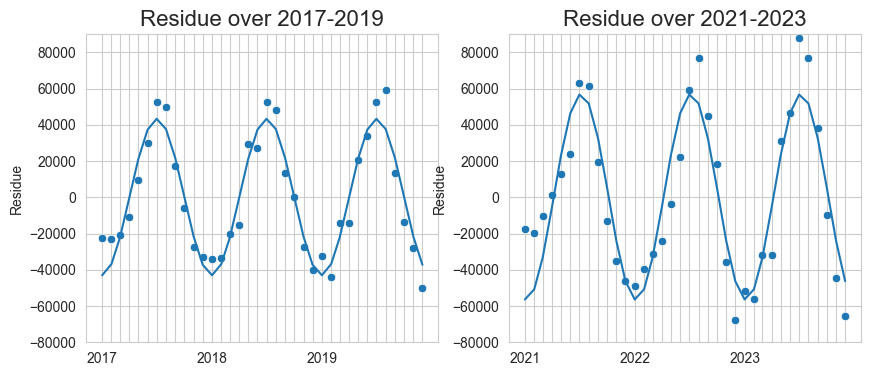

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
fig.set_figheight(4)
fig.set_figwidth(10)
sns.lineplot(x = cong_1['Year-Month'].values, y = reg_3.predict(cong_1[['Cos','Sin']]), ax = ax[0])
sns.scatterplot(x = cong_1['Year-Month'].values, y = cong_1['Residue'], ax = ax[0])
ax[0].set_xticks(cong_1['Year-Month'])
new_labels = [date.fromordinal(int(item)).year for item in ax[0].get_xticks()]
ax[0].set_xticklabels(new_labels)
for ind, label in enumerate(ax[0].get_xticklabels()):
    if ind % 12 == 0:  # every 12th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax[0].set_title('Residue over 2017-2019',fontsize=16)
ax[0].set_ylim(-80000,90000)

sns.lineplot(x = cong_2['Year-Month'].values, y = reg_4.predict(cong_1[['Cos','Sin']]), ax = ax[1])
sns.scatterplot(x = cong_2['Year-Month'].values, y = cong_2['Residue'], ax = ax[1])
ax[1].set_xticks(cong_2['Year-Month'])
new_labels = [date.fromordinal(int(item)).year for item in ax[1].get_xticks()]
ax[1].set_xticklabels(new_labels)
for ind, label in enumerate(ax[1].get_xticklabels()):
    if ind % 12 == 0:  # every 12th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax[1].set_title('Residue over 2021-2023',fontsize=16)
ax[1].set_ylim(-80000,90000)


plt.show()

Remark : There seems to be a linear increase in the ampitude of waves over years as well, which we did not implement.

Conclusion:
1. Regression plots of the residue using sin and cos functions seem fit.
2. This periodic behavior in months is clearly caused by the weather, daylight, etc. We should consider detailed models, e.g. regression, in a seperate notebook.
3. There is also a trend in the amptitude of the waves over the years, while the climate data shows no trend. This might also be something that we should incorporate when modelling.

## (No) Seasonality in Weekday

This section is mostly irrelevant. But I keep it there just for reference. In this section, we attempt to find any relations between bike usage and weekday(Mon, Tue, Wed, etc). The result shows little information, which is to be expected. At this time scale(daily), the bike usage is more likely to be influenced by the actual weather condition than by which weekday it is.

In [30]:
def get_weekday(d_string):
    return(datetime.strptime(d_string, '%Y-%m-%d').weekday())

In [31]:
# create a column showing which weekday it is
bike['Weekday'] = bike['Date'].apply(get_weekday)

In [32]:
#create another column in the form of 'w%d-%d'. For example, 'w1-0' means Sunday of week 1 of that year. 
bike['Week & Day'] = np.nan
bike['Week'] = np.nan

In [33]:
y_bike = bike.loc[bike.Year=='2017']
i = y_bike.index.min()
while y_bike.iloc[i]['Weekday'] != 0:
    i+=1
for index in range(i,y_bike.index.max()+1):
    week_no = (index-i)//7 + 1
    y_bike.loc[index, 'Week'] = week_no
    y_bike.loc[index, 'Week & Day'] = 'w' + str(week_no) + '-' + str(y_bike.iloc[index]['Weekday'])

/var/folders/z_/vfnvng3n3hg_y07yr6f3l64w0000gn/T/ipykernel_24741/3625831382.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'w1-0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  y_bike.loc[index, 'Week & Day'] = 'w' + str(week_no) + '-' + str(y_bike.iloc[index]['Weekday'])


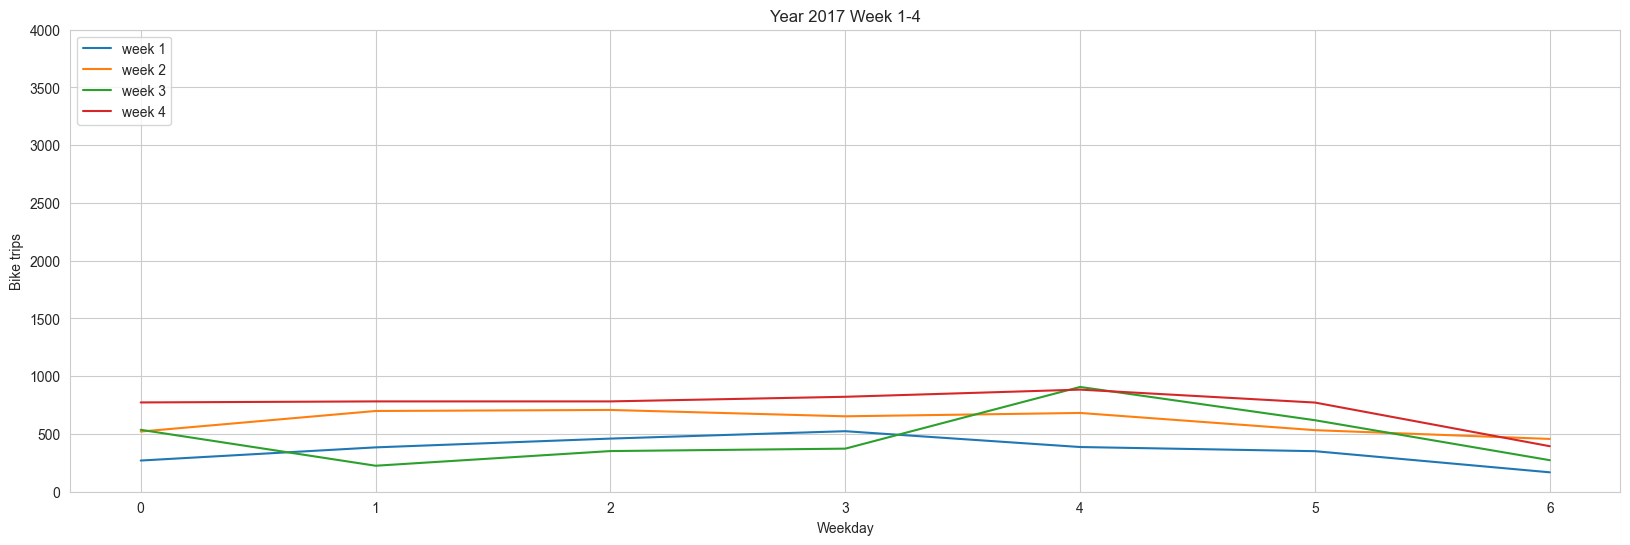

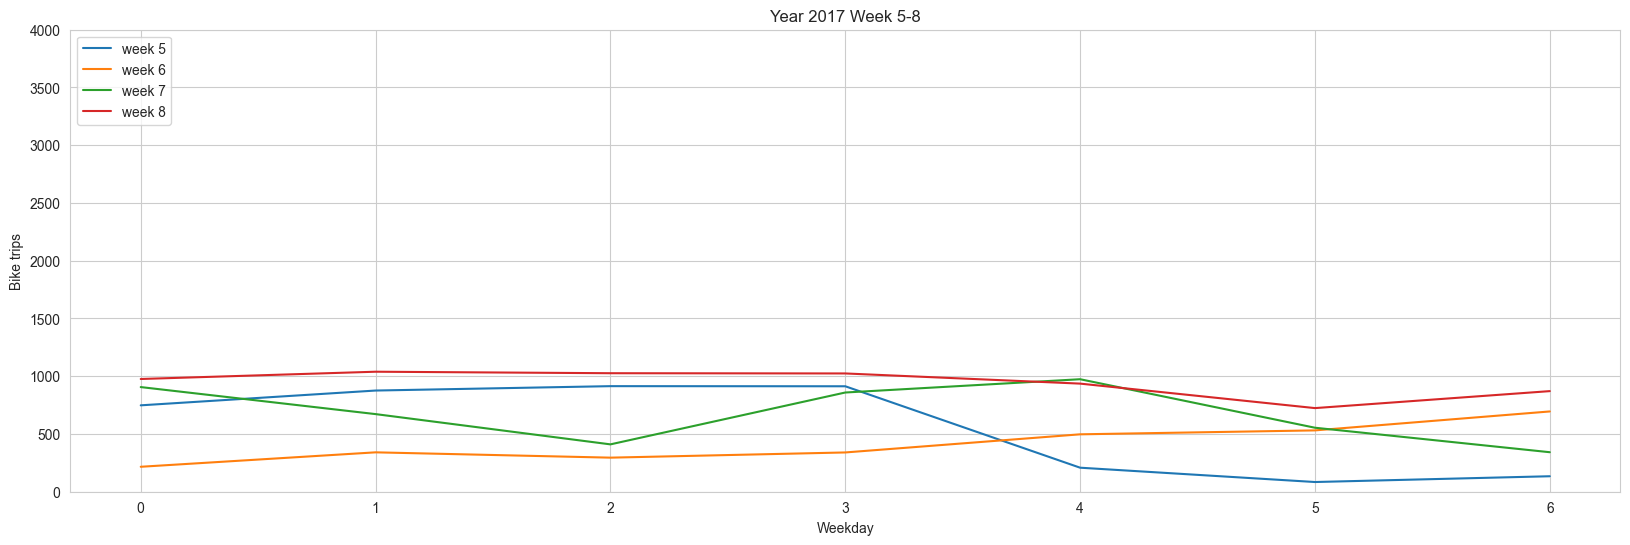

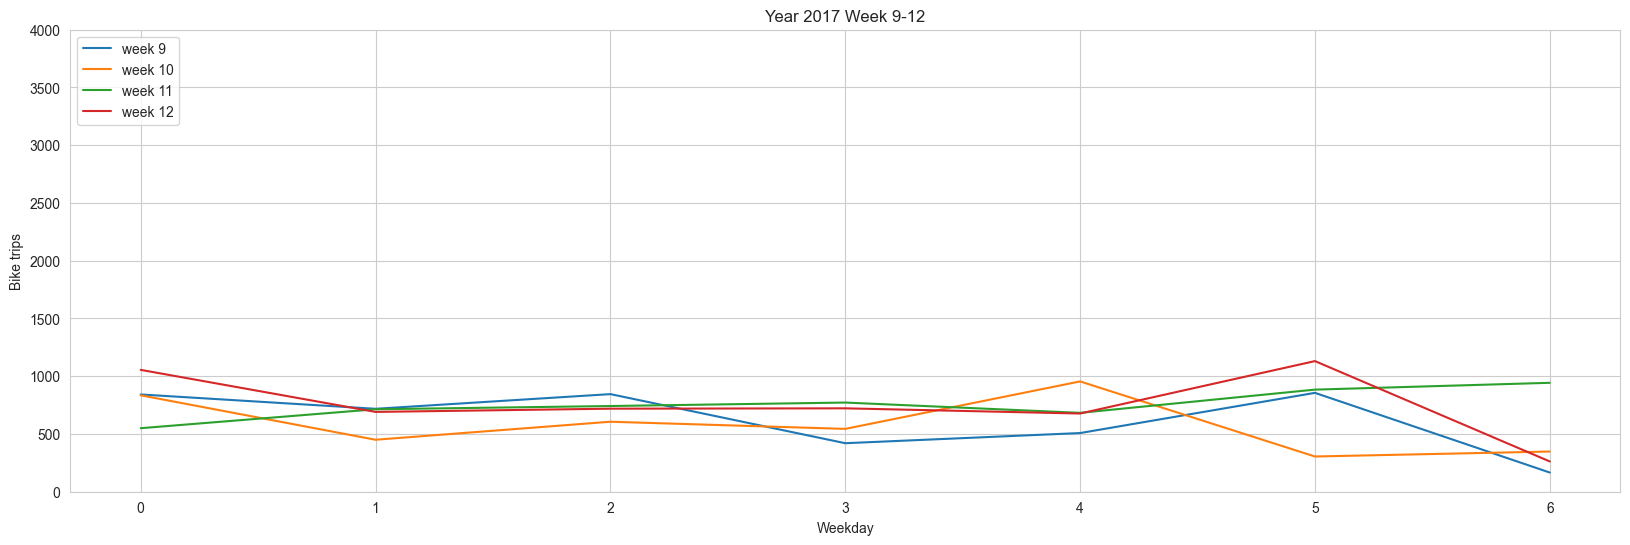

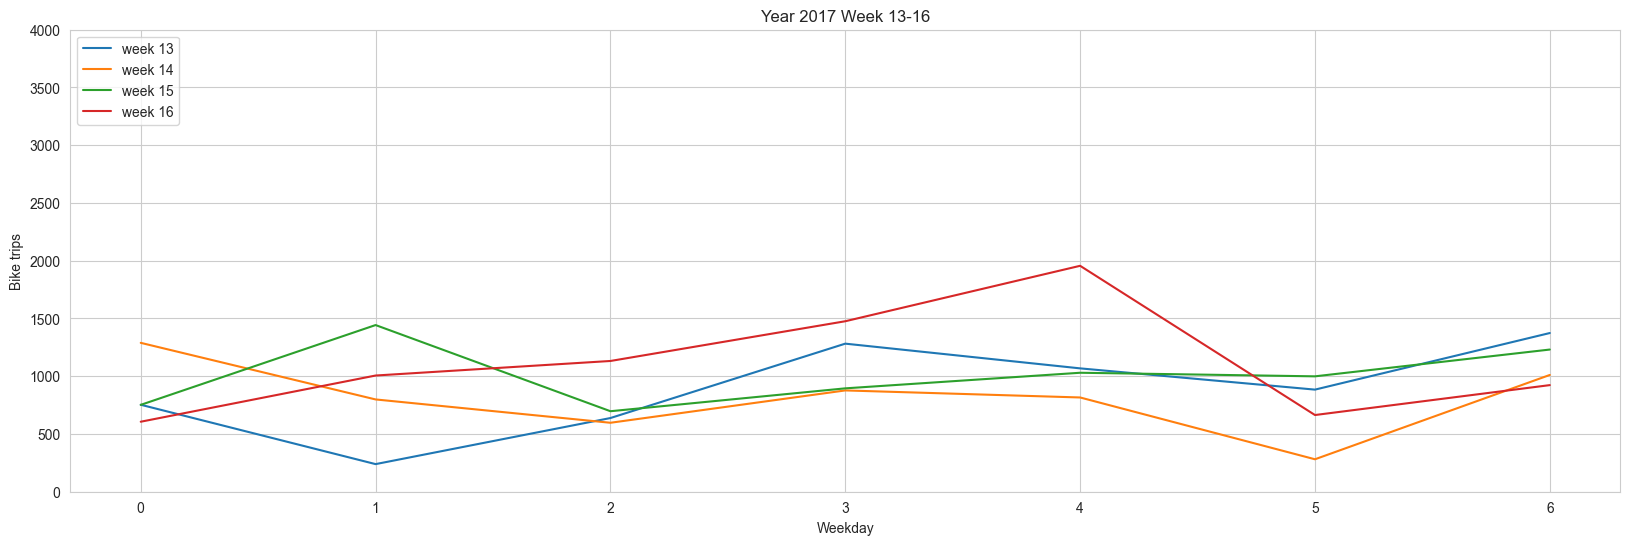

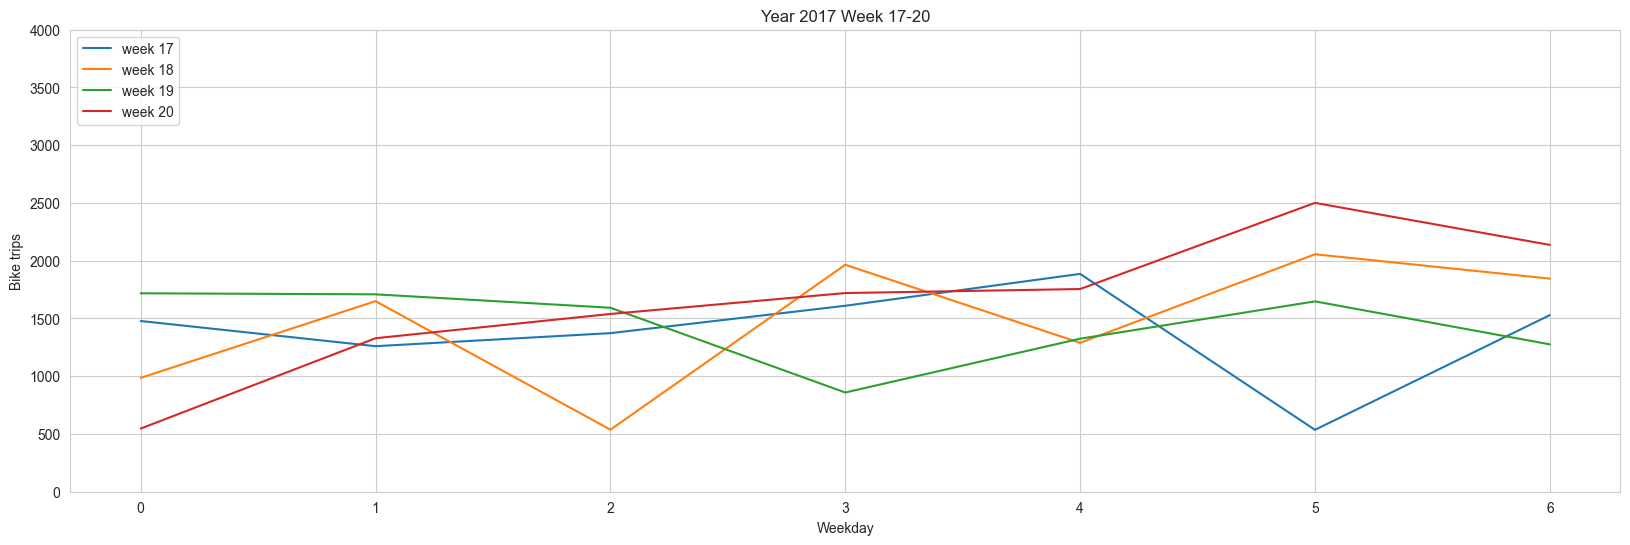

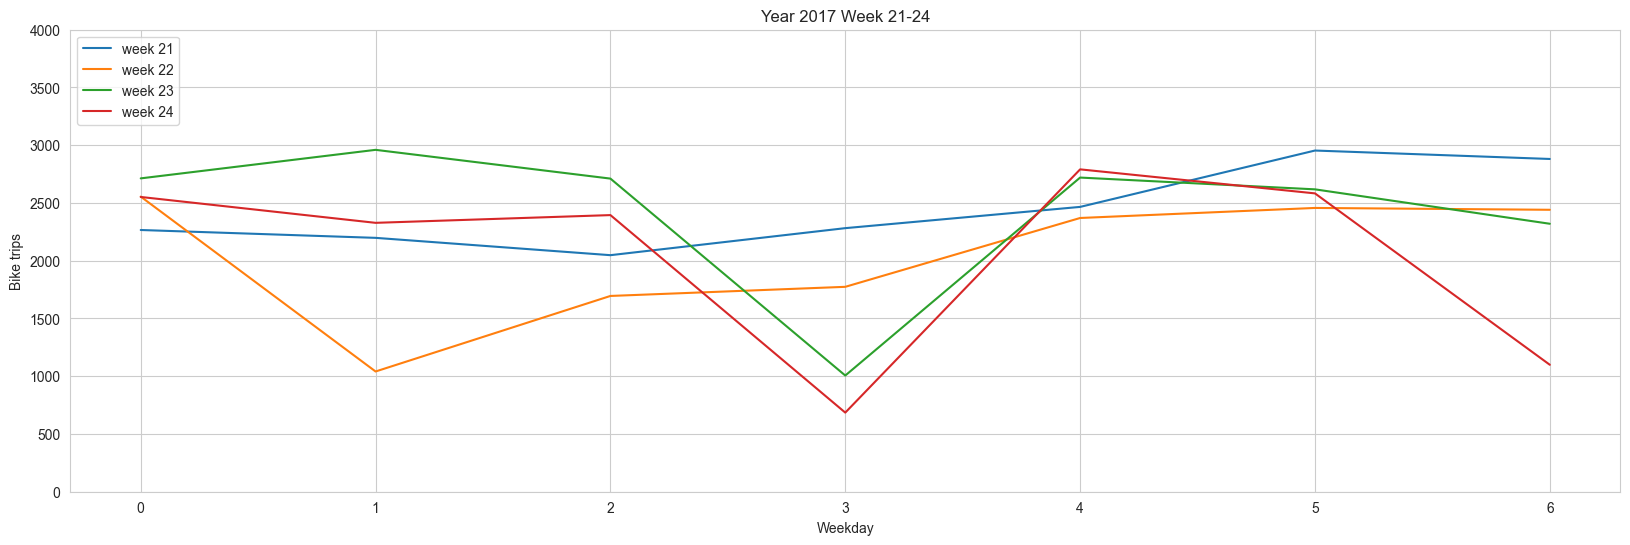

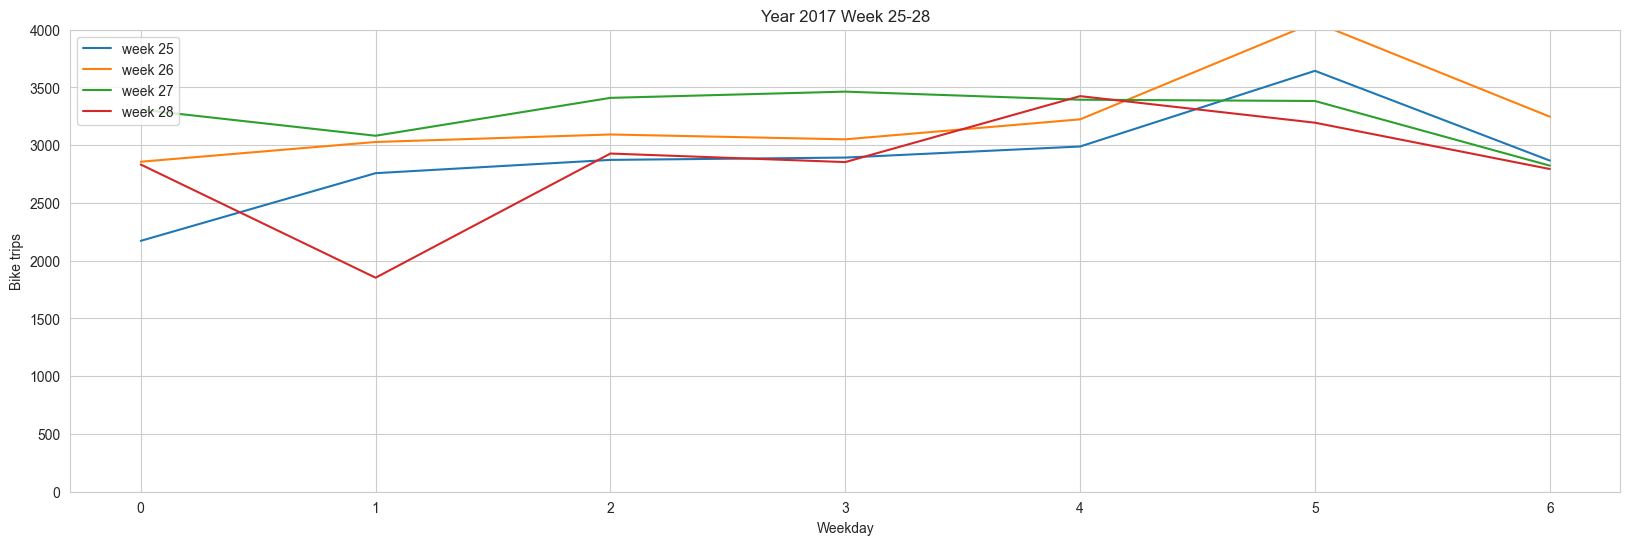

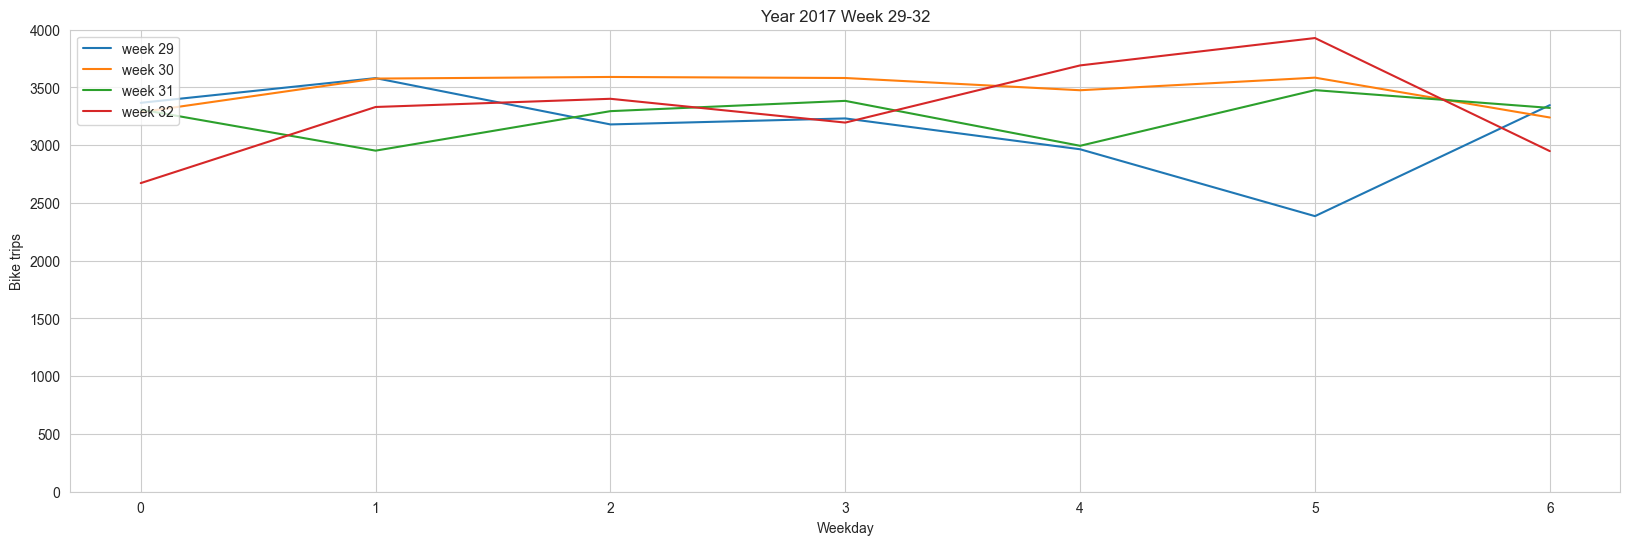

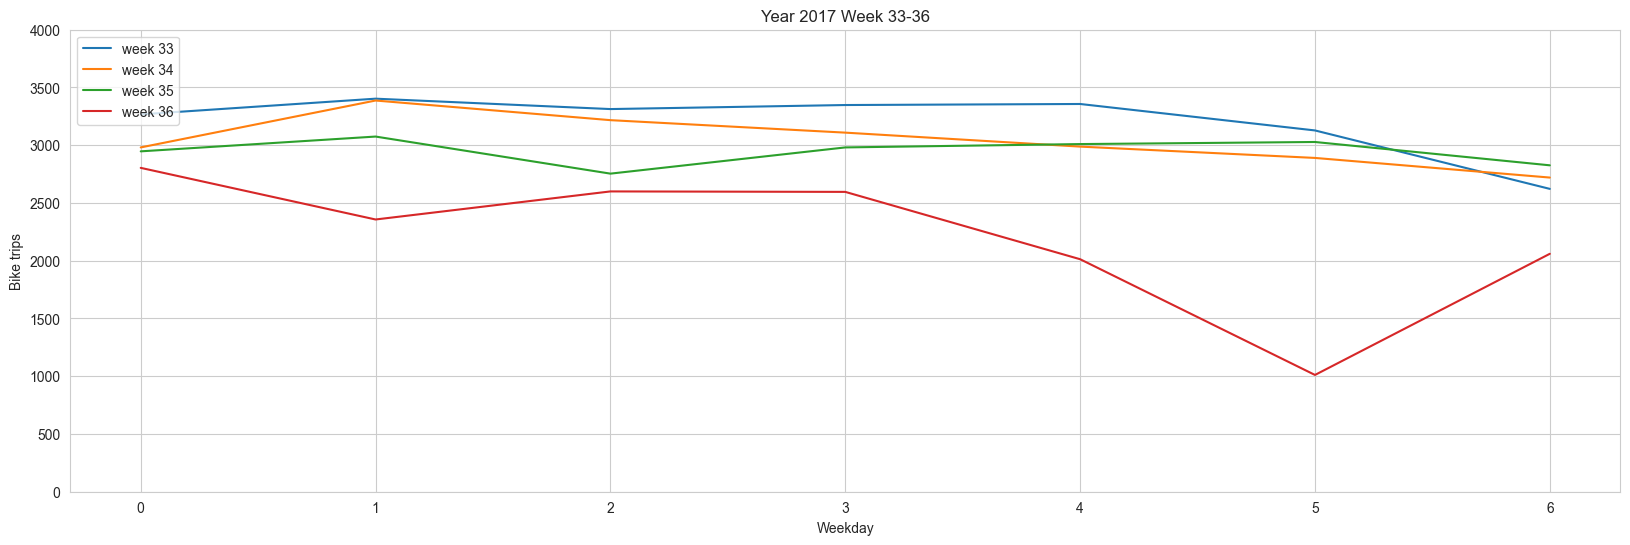

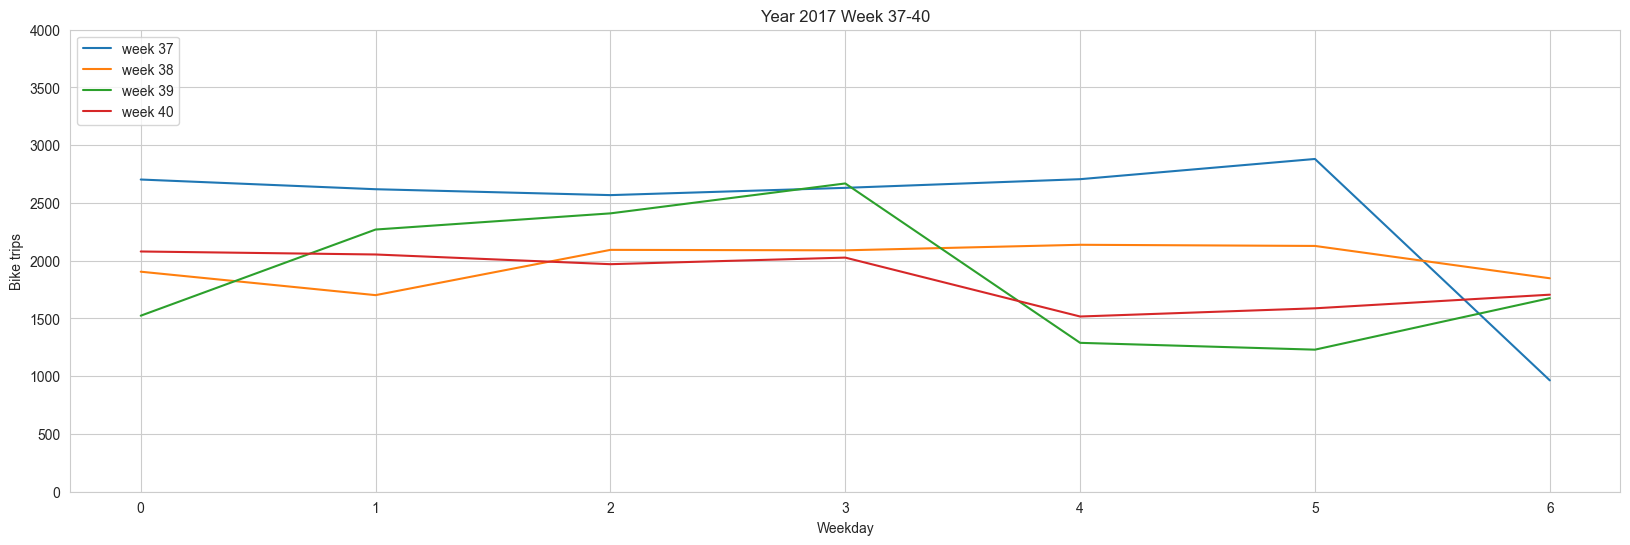

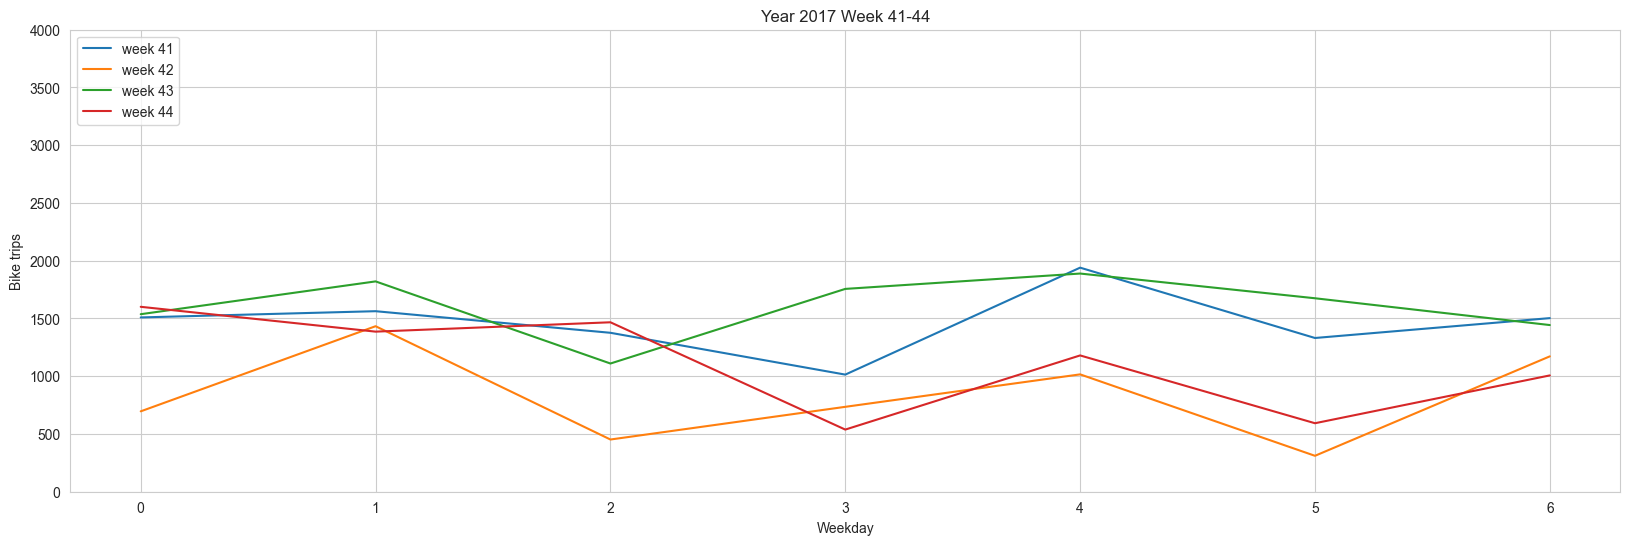

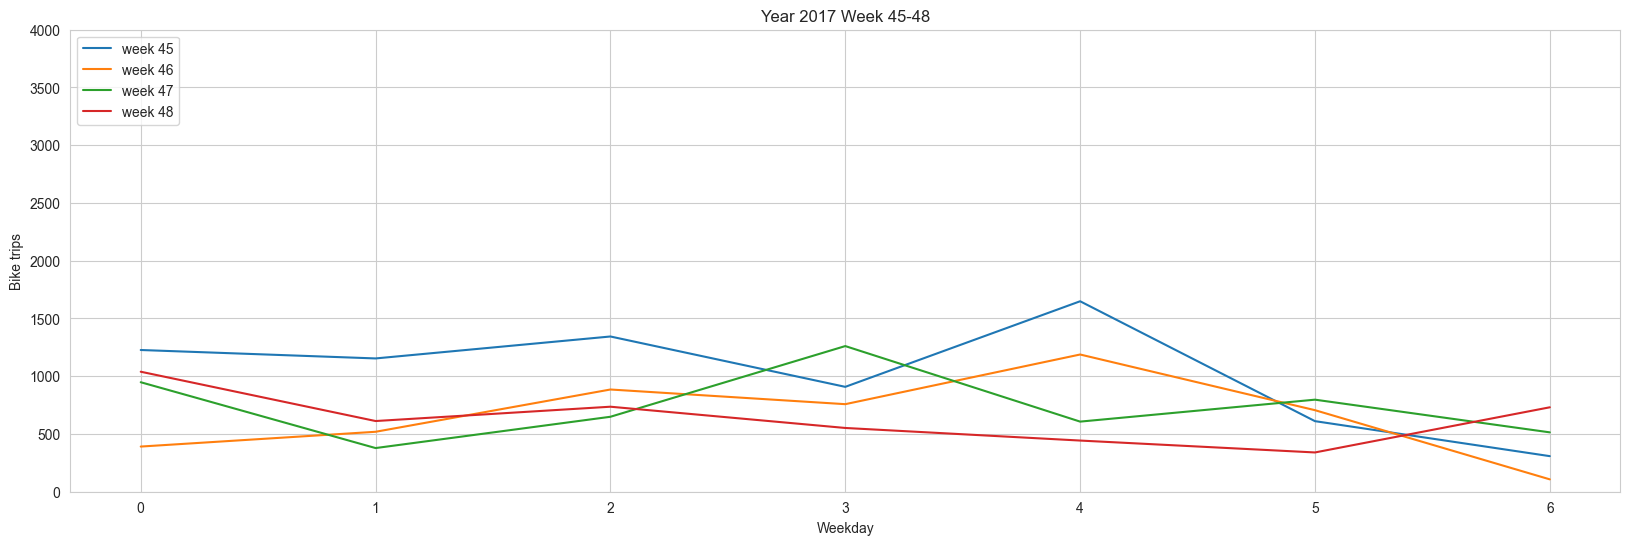

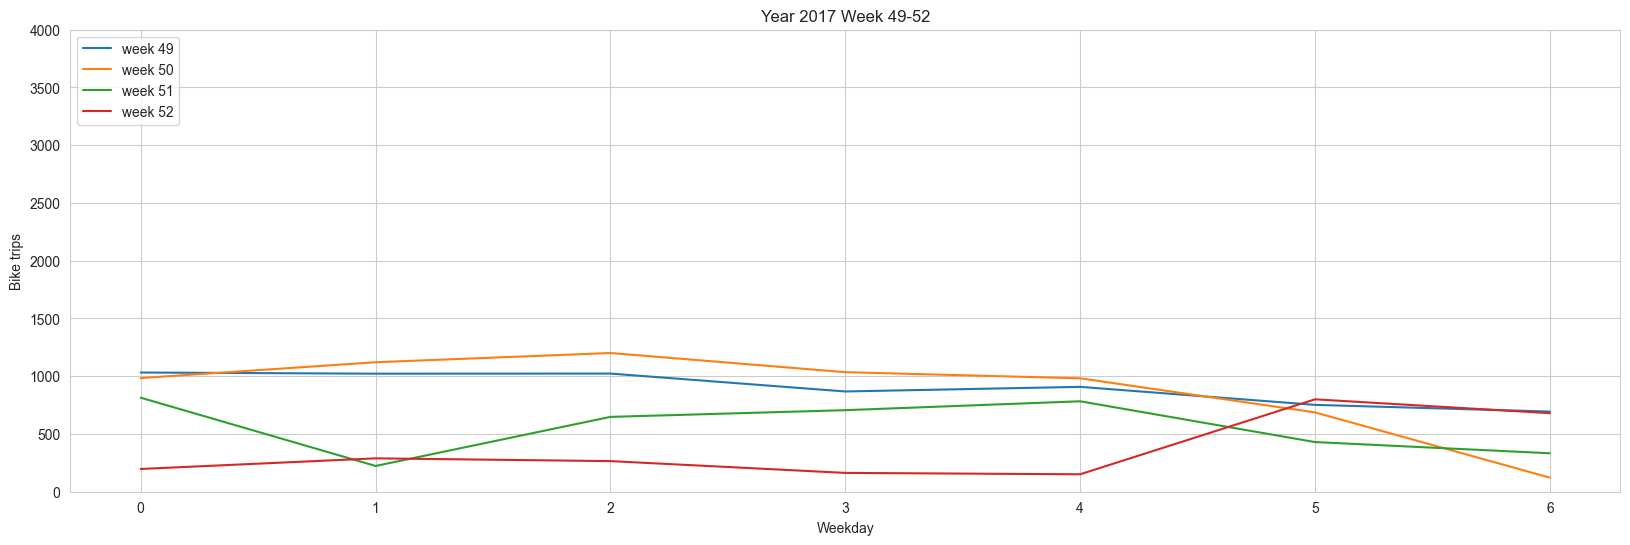

In [34]:
#Try plotting group_size weeks in group
group_size = 4
group_max = int(y_bike.Week.max()//group_size + 1)
    
for group_no in range(0,group_max-1):
    plt.figure(figsize=(20,6))
    for week in range(group_size * group_no + 1, group_size * group_no + group_size + 1):
        w_bike = y_bike.loc[y_bike.Week == week]
        sns.lineplot(data=w_bike,x='Weekday',y='Bike trips',label='week ' + str(week))
    plt.legend(loc=2)
    plt.title('Year 2017 Week ' + str(group_size * group_no + 1) + '-' + str(group_size * group_no + group_size))
    plt.ylim(0,4000)
    plt.show()
    
    


The plots don't show a clear sign of seasonality in weekdays. I suspect the weather data is much more relevant at daily scale than date. We should continue exploring the influence of weather data in another notebook.